In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

import cv2
print(cv2.__version__)

4.5.3


In [2]:
from importlib.metadata import version

from pixellib.semantic import semantic_segmentation
print(version('pixellib'))

0.7.1


(500, 892, 3)


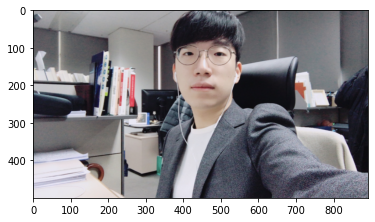

In [3]:
# 나의 이미지를 가져온다.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# Segmantation model 생성
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model = semantic_segmentation()

In [5]:
# PASCAL VOC 데이터로 학습된 모델을 이용
model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
output

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [128, 128, 192],
        [128, 128, 192],
        [128, 128, 192]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [128, 128, 192],
        [128, 128, 192],
        [128, 128, 192]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [128, 128, 192],
        [128, 128, 192],
        [128, 128, 192]]

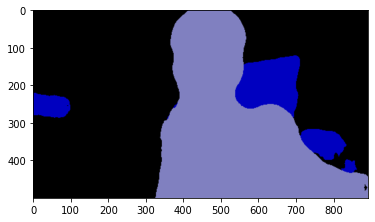

In [7]:
# output 은 BGR 값이지만, 일단 출력
plt.imshow(output)
plt.show()

In [8]:
# 위의 사진에서는 0, 9, 15 가 검출되었음. (0은 background)
segvalues

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [9]:
# PASCAL VOC 데이터로 학습된 모델에서는 21개의 label 이 있음. (0은 background)
LABEL_NAMES = ['background',
               'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
               'bus', 'car', 'cat', 'chair', 'cow',
               'diningtable', 'dog', 'horse', 'motorbike', 'person',
               'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [10]:
# 위 사진에서 검출된 0, 9, 15 세 개의 segment value는 아래와 같음.
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [11]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:21]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0],
       [  0,  64, 128]])

In [12]:
# person 인 15 의 RGB 값
colormap[15]

array([192, 128, 128])

In [13]:
# person 인 15 의 RGB는 값은, (192, 128, 128)이지만,
# output 은 BGR 값이므로,
# output 과 비교를 위해서, 아래와 같이 seg_color 선언.
seg_color = (128,128,192)

(500, 892)


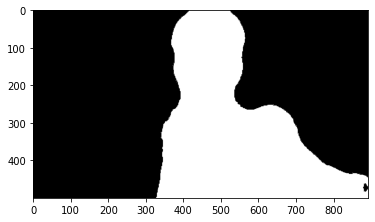

In [14]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

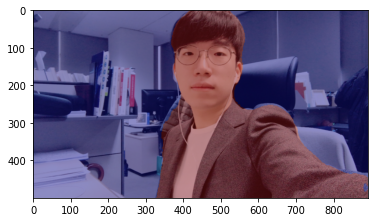

In [15]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

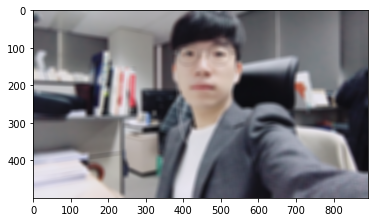

In [16]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

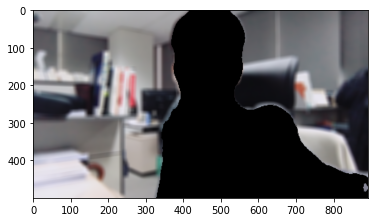

In [17]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# 이미지 반전
#  원래 마스크에서는 배경이 0, 사람이 255 이었으니, bitwise_not 연산을 하고 나면 배경은 255, 사람은 0 이 됨.
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

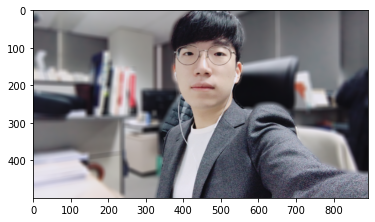

In [18]:
# 배경과 사람 영상 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# from importlib.metadata import version
#import cv2
# import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


## Step 1. 인물모드 직접 해 보기

최소 3장 인물모드 사진
귀여운 고양이 아웃포커싱
크로마키 배경 합성

(759, 1024, 3)


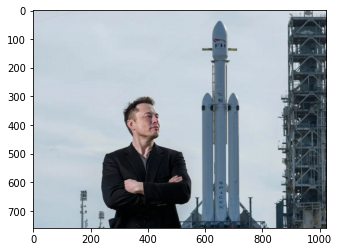

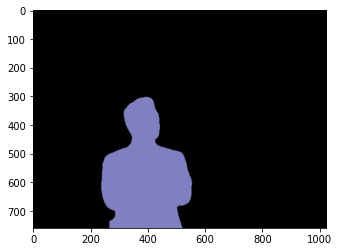

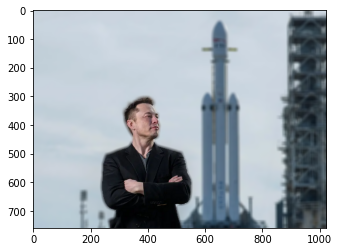

In [20]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/merlin_133348473_de45abcc-f789-45f1-8f84-dfdfcec3c276-jumbo.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

seg_color = (128,128,192)
seg_map = np.all(output==seg_color, axis=-1)

img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

img_orig_blur = cv2.blur(img_orig, (13,13))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

# 배경과 사람 영상 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(527, 936, 3)


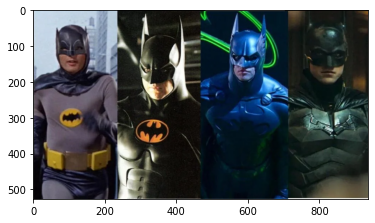

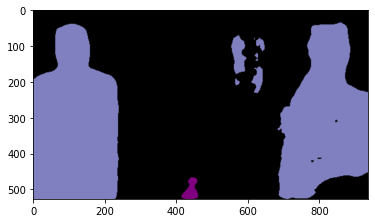

[128 128 128]


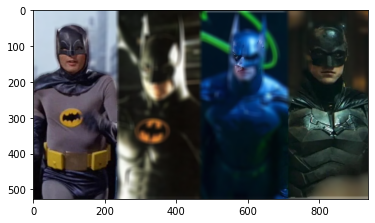

In [21]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/batman-movies-936x527.webp'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
print(colormap[7]) # person

seg_color = (128,128,192)
seg_map = np.all(output==seg_color, axis=-1)

img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

img_orig_blur = cv2.blur(img_orig, (13,13))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

# 배경과 사람 영상 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(382, 600, 3)


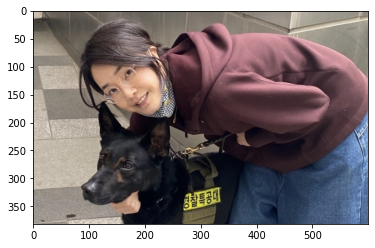

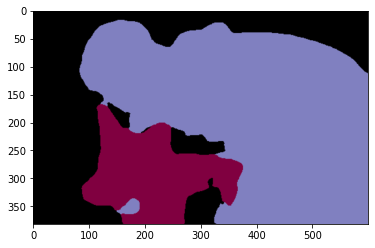

[ 64   0 128]


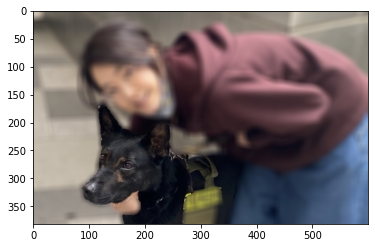

In [22]:
#img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/73642_75600_5158.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
print(colormap[12]) # dog
# [ 64,   0, 128],

seg_color = (128,0,64)
seg_map = np.all(output==seg_color, axis=-1)

img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

img_orig_blur = cv2.blur(img_orig, (13,13))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

# 배경과 사람 영상 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(550, 1920, 3)


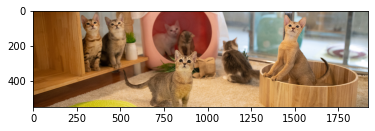

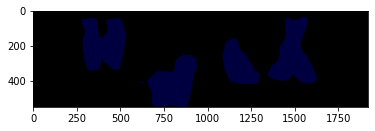

[128 128 128]


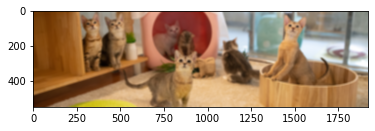

In [23]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/main9.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
print(colormap[7]) # cat
# [128, 128, 128],

seg_color = (128,128,128)
seg_map = np.all(output==seg_color, axis=-1)

img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

img_orig_blur = cv2.blur(img_orig, (13,13))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

# 배경과 사람 영상 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(500, 892, 3)


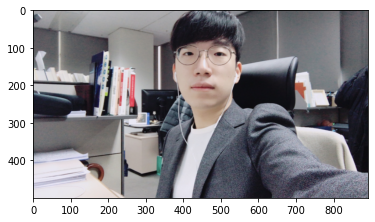

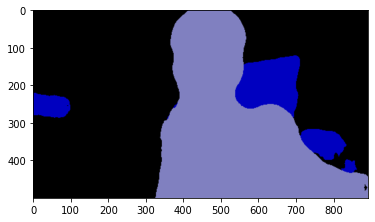

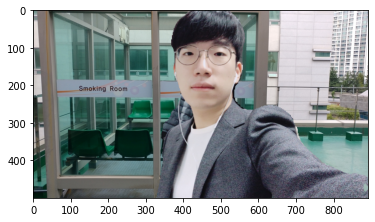

In [24]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

model.load_pascalvoc_model(model_file)
segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
# person 인 15 의 RGB 값
colormap[15]

seg_color = (128,128,192)
seg_map = np.all(output==seg_color, axis=-1)

img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

img_orig_blur = cv2.blur(img_orig, (13,13))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

# 배경과 사람 영상 합치기
img_path_SR = os.getenv('HOME')+'/aiffel/human_segmentation/images/SmokingRoom.jpg'
img_SR = cv2.imread(img_path_SR)

img_concat = np.where(img_mask_color==255, img_orig, img_SR)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## Step 2. 사진에서 문제점 찾기

person을 잘 분류하였지만, 옷 색깔과 비슷한 후방의 옷까지 같이 인식해 버리는 문제.

머리숱이 풍성하고 진하게 딱 붙었을 경우는 괜찮은 편이지만,<br>
머리숱이 적거나 떴을 경우, 경계면에서 뭉게져버리는 현상

대상과 Blur처리된 배경화면과의 이질감

베트맨 사진처럼 가면을 쓸 경우, person으로, 인식, 부분인식, 또는 인식 못하는 경우가 생겼음.<br>
특히 베트맨 가면의 귀 같은 뾰족한 부분은 person으로 분류 못함.

경찰견에 사람 손과 명찰 등이 붙어있으면,<br>
머리부분만 dog 로 따버리는 현상.

가까이 있는 고양이와 멀리 있는 고양이들을 모두 따서,<br>
Blur 된 배경에 붙여버리면, 원근감이 이상해짐.

## Step 3. 해결 방법을 제안해 보기

유사한 색상의 물체가 대상의 이미지와 붙어 있을 경우,<br>
대상과 동일시 하므로, 대상과 비슷한 색상의 물체가 대상의 경계와 접하지 않도록 치울 것.

너무 밝은 배경에서는 머리카락 주변이 이상하므로, 다소 배경으로 하기.

고해상도로 사진으로 찍어서 합친 다음,<br>
이미지를 축소하여, 경계선의 이질감을 감소시키기.

대상의 경계를 구분하여, 칼로 자르듯이 떼어내고, 배경만 blur처리 한 다음, 그대로 붙여버린 것이므로,<br>
자연계에서 경계면을 자주 보았던 인간의 신경망은, 이를 기존과 다른 이상한 상태로 볼 수 밖에 없음.<br>
AI로, 대상과 배경의 경계부분을 자연스럽게 보이도록 처리.

DSLR 카메라에서,
조리개를 벌려서 밝게 하면, 초점이 맺히는 구간이 좁아지고, 주변은 빛들이 섞여서 blur 된다.<br>
반대로 조리개를 조이면, 전체 영역에 대하여 초점이 맞아 선명해진다.

인물사진처럼 대상에만 초점이 맞고, 주변이 흐려지는 사진을 얻을려면,
렌즈가 작은 카메라에서는 어렵고,<br>
DSLR 카메라처럼 렌즈 구경이 크고 밝은 렌즈에서 잘 되었으나,
이제는 소프트웨어적으로도 효과를 줄 수 있게 되었다.

이번 노드에서는, 경계선을 칼처럼 잘라서, blur된 배경과 합쳐버렸으므로,
경계선 부근이 극단적으로 이질적이 되었음.<br>
DSLR 카메라로 심도를 조절했다면, 칼처럼 영역이 구분되는 것이 아니라,
경계부분이 스므스하게 변하여 자연스러웠을 것임.<br>
이를 모방하여, 경계선 보다 보다 넓은 면적에 대하여 자연스럽게 넘어가도록 처리함.

## 회고

pixellib 의 semantic_segmentation 에서,<br>
PASCAL VOC 데이터로 학습된 모델을 이용하여,<br>
사람, 고양이, 개 등을 식별하는 것을 해보았습니다.<br>
<br>
특히 경찰견의 목을 안으면서, 개의 머리에 가려져서,<br>
사람의 몸과는 연결되지 않아보이는,<br>
김건희 님의 손까지 person으로 구분되어,<br> 신기하고 놀라웠습니다.<br>
<br>
대단하다고 생각했으며,<br>
베트맨처럼 가면을 쓴 경우도 인식하거나 못하거나, 귀가 잘리는 현상이 있었는데,<br>
어느 정도의 변형까지 제대로 인식할 수 있을지, 마구마구 테스트 해보고도 싶고,<br>
<br>
20개 대상에 대하여, 어느 정도의 변형까지 구분할 수 있을지,<br>
많이 사용하게 될 것 같기도 하고,<br>
만약, 그 보다 더 좋은 것이 있다고, 갈아타겠지만~<br>
<br>

고화질에서도 속도만 나와준다면...<br>
속도가 안 나온다면 실시간은 안되더라도,<br>
딜레이를 주면서, 찍으면~<br>
20개 사물까지만 구분하는 자율주행(?)은 아니고,<br>
장난감으로 만들어도 재미있겠습니다.<br>
<br>
4K 이상의 이미지로 찍어서,<br>
이를 어떤 방식으로 해상도를 낮추면서 자연스럽게 될 지?<br>
<br>
Blur도 어떤 종류가 있고, 어떤 값들을 주면 자연스러움에 가까워질 수 있는지,<br>
직접 해보고 알아보고 싶은 것은, 오늘도 늘어만 갑니다.